In [47]:
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set()

In [48]:
df = pd.read_csv('./stats/splits.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60418 entries, 0 to 60417
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        60418 non-null  int64  
 1   pop_name          60418 non-null  object 
 2   condition         60418 non-null  object 
 3   test_name         60418 non-null  object 
 4   first_split       60355 non-null  object 
 5   first_split_val   58850 non-null  object 
 6   second_split      57100 non-null  object 
 7   second_split_val  57100 non-null  object 
 8   third_split       39159 non-null  object 
 9   third_split_val   39159 non-null  object 
 10  fourth_split      11498 non-null  object 
 11  fourth_split_val  11498 non-null  object 
 12  low_val_pct       60418 non-null  float64
 13  normal_pct        60418 non-null  float64
 14  high_val_pct      60418 non-null  float64
dtypes: float64(3), int64(1), object(11)
memory usage: 6.9+ MB


In [49]:
df = df[df.condition == 'active_malignancy=0 and ibd=0 and rhemartoid_arthritis=0']
df = df[df.pop_name == 'overall']

In [4]:
import numpy as np
paths = df[df.condition == 'active_malignancy=0 and ibd=0 and rhemartoid_arthritis=0'][['first_split','second_split', 'third_split', 'fourth_split']]
paths = {tuple(x[1]) for x in paths.iterrows()}
paths = {tuple(['{}_{}'.format(i,x) for i, x in enumerate(p) if type(x) == str]) for p in paths}
len(paths)

68

In [5]:
import networkx as nx
paths = {x for x in paths if len(x) and x[0] in {
 '0_age_group',
 '0_birth_area',
 '0_bmi_category',
 '0_district',
 '0_ethnicity',
 '0_gender',
 '0_sector',
 '0_ses',
 '0_smoking_status',
 '0_time_from_immigartion'}}

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

colors = plt.cm.Pastel1.colors
colored_nodes = sorted({x[1] for x in paths if len(x) > 1})
colors = {x: colors[i] for i,x in enumerate(colored_nodes)}

G = nx.DiGraph()

for k, v in colors.items():
    G.add_node(k, color=v)
for p in paths:
    G.add_edges_from([('active_malignancy=0 and ibd=0 and rhemartoid_arthritis=0', p[0])])
    for i in range(len(p)-1):
        G.add_edge(p[i], p[i+1])

plt.figure(figsize=(20,10))
    
pos = graphviz_layout(G, prog="dot")
nx.draw(G, pos, with_labels=True, font_weight='bold',node_size=1500, font_size=18, node_color=[colors.get(x, 'gray') for x in G.nodes], edge_color=[colors.get(v, 'black') for u,v in G.edges])
plt.show()
    #nx.draw(G, with_labels=True, font_weight='bold')

ModuleNotFoundError: No module named 'pydot'

In [10]:
districts = """Jerusalem/1
Tel Aviv/2
Dan - Petach Tikva/4
Haifa/5
Central/7
South/9
Sharon - Shomron/12
North/15
Eilat/16""".split('\n')
districts = [x.split('/') for x in districts]
districts = {x[1]: x[0] for x in districts}
districts

{'1': 'Jerusalem',
 '2': 'Tel Aviv',
 '4': 'Dan - Petach Tikva',
 '5': 'Haifa',
 '7': 'Central',
 '9': 'South',
 '12': 'Sharon - Shomron',
 '15': 'North',
 '16': 'Eilat'}

C:\ProgramData\Anaconda2\envs\strauss\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


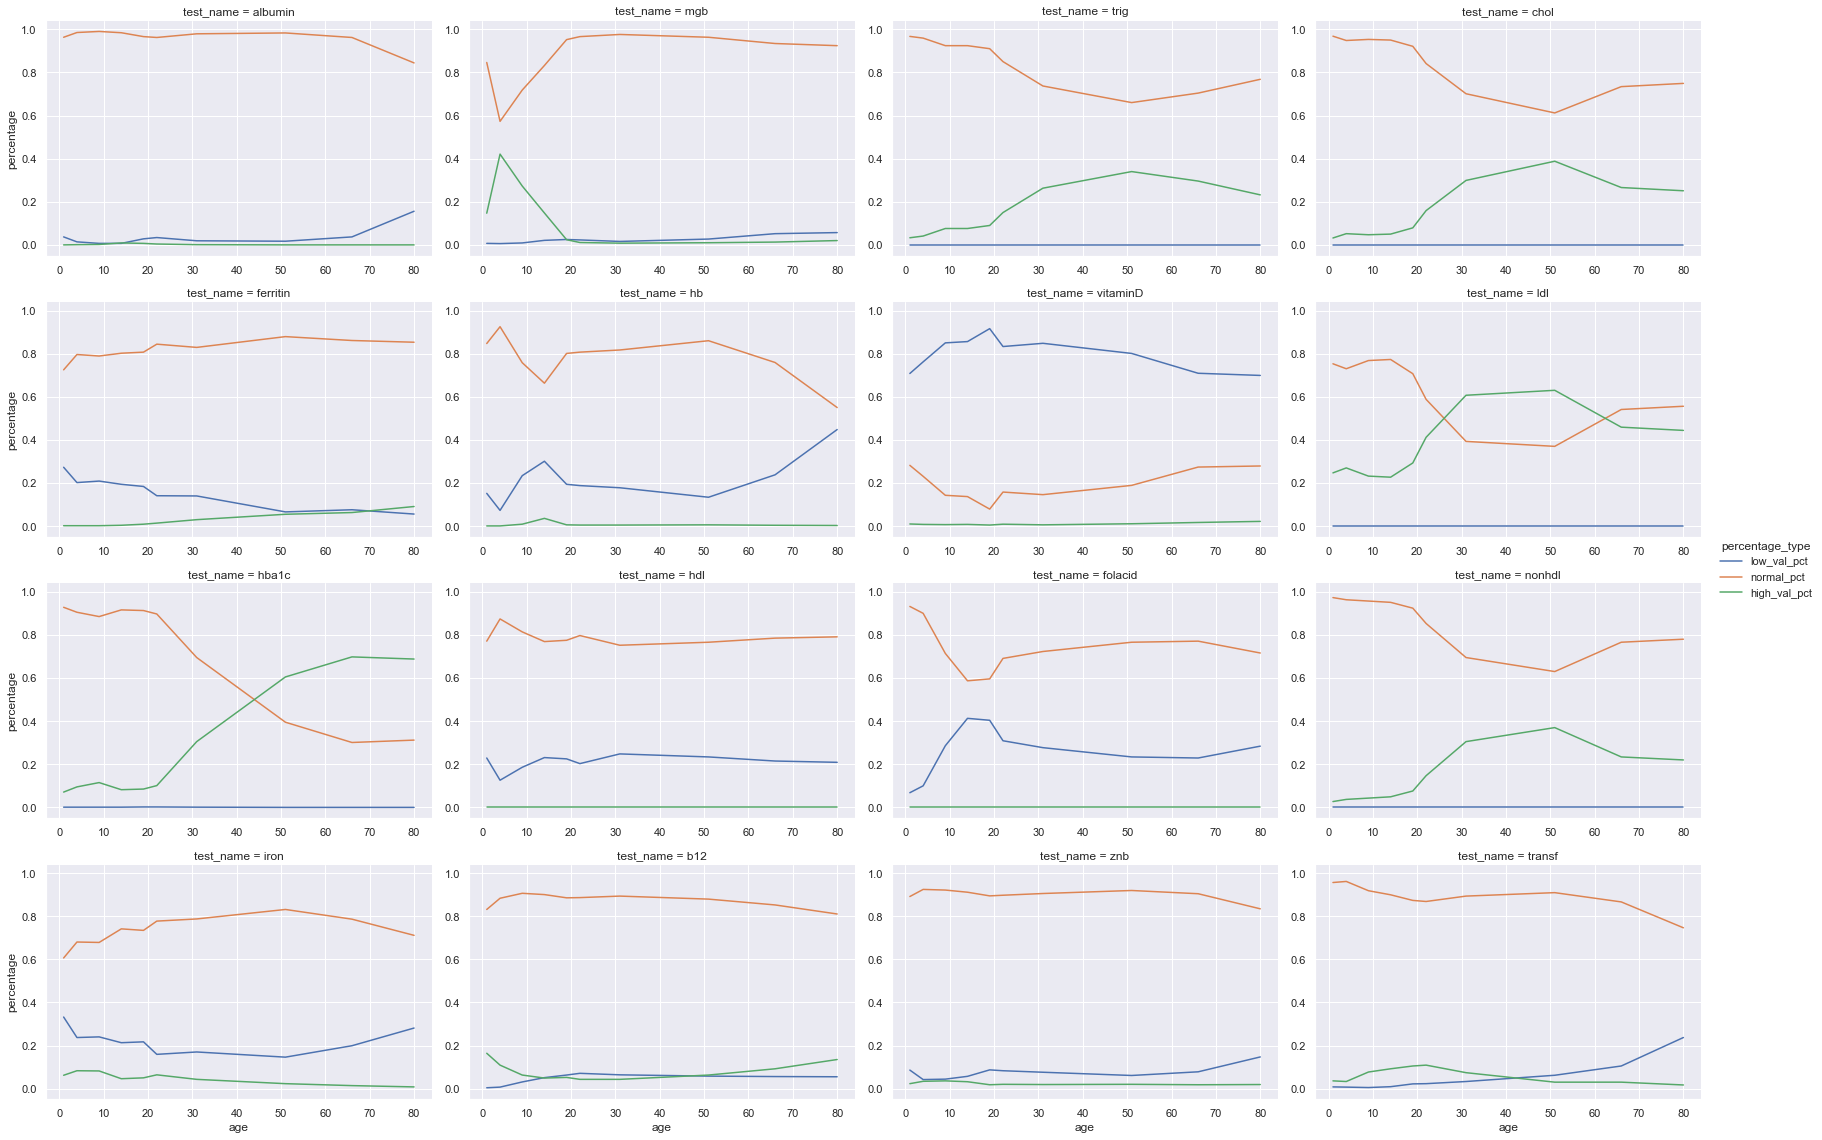

In [11]:
tmp = df[(df.first_split == 'age_group') & (df.second_split.isna())]
#tmp['district'] = tmp.second_split_val.apply(lambda x: districts[x])
#tmp['sector'] = tmp.first_split_val.apply(lambda x: {'1': 'Arab', '2': "Haredi", '9': 'Others'}[x])
tmp['age'] = tmp.first_split_val.apply(lambda x: int(x.split('-')[0].split('+')[0]))
#tmp = tmp[tmp.sector != 'Arab']
tmp = tmp.melt(id_vars=['age', 'test_name'],value_vars=['low_val_pct', 'normal_pct', 'high_val_pct'], var_name='percentage_type', value_name='percentage')
g = sns.FacetGrid(data=tmp, col_wrap=4,col='test_name', sharex='none',sharey='none', aspect=1.5, height=4, hue='percentage_type')
g.map(sns.lineplot, "age", "percentage", markers=True)
g.add_legend()

C:\ProgramData\Anaconda2\envs\strauss\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\envs\strauss\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


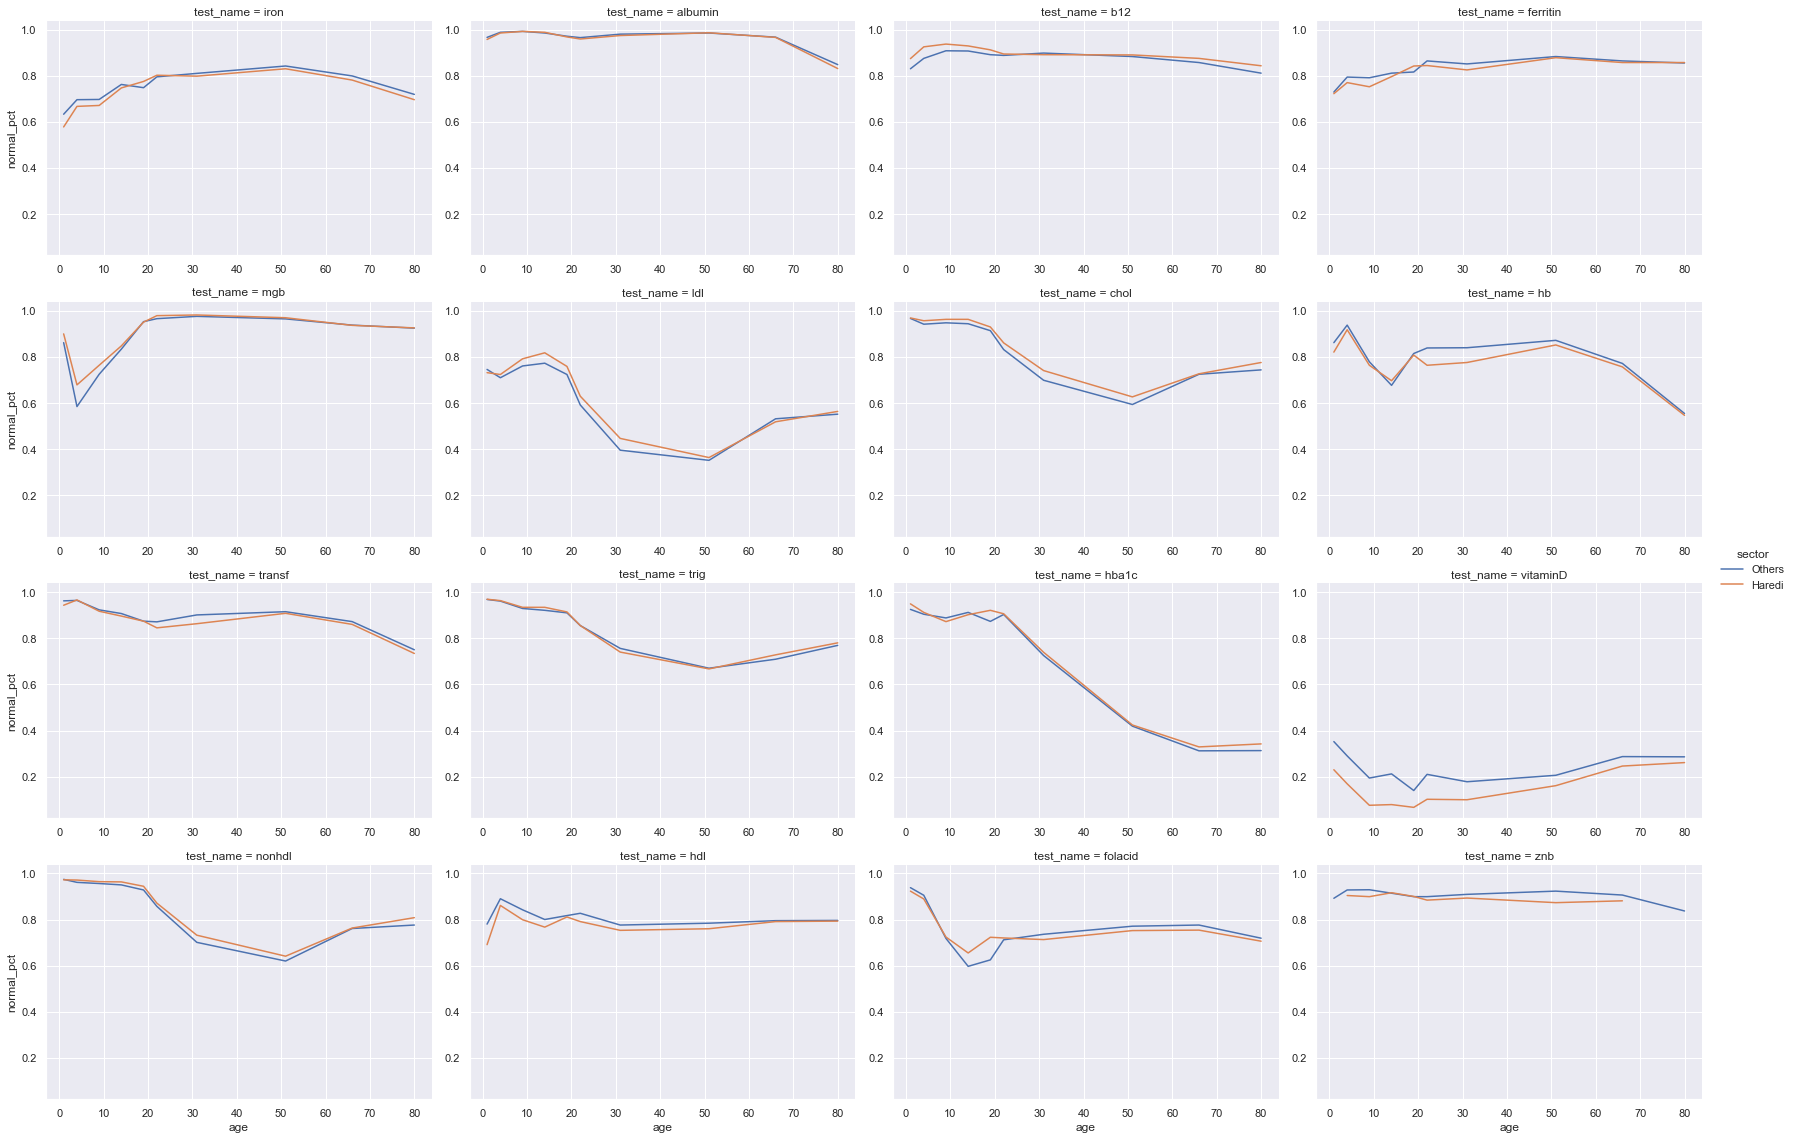

In [12]:
tmp = df[(df.first_split == 'sector') & (df.second_split == 'age_group')& (df.third_split.isna())]
#tmp['district'] = tmp.second_split_val.apply(lambda x: districts[x])
tmp['sector'] = tmp.first_split_val.apply(lambda x: {'1': 'Arab', '2': "Haredi", '9': 'Others'}[x])
tmp['age'] = tmp.second_split_val.apply(lambda x: int(x.split('-')[0].split('+')[0]))
tmp = tmp[tmp.sector != 'Arab']
#tmp = tmp.melt(id_vars=['sector', 'age', 'test_name'],value_vars=['low_val_pct', 'normal_pct', 'high_val_pct'])
g = sns.FacetGrid(data=tmp, col_wrap=4,col='test_name', sharex='none',sharey='none', aspect=1.5, height=4, hue='sector')
g.map(sns.lineplot, "age", "normal_pct", markers=True)
g.add_legend()

In [54]:
tmp = df[(df.first_split == 'district') & (df.second_split == 'age_group')& (df.third_split.isna())]
#tmp['district'] = tmp.second_split_val.apply(lambda x: districts[x])
tmp['district'] = tmp.first_split_val.apply(lambda x: districts[x])
tmp['age'] = tmp['second_split_val']
tmp[['test_name', 'district', 'age', 'normal_pct']].to_csv('splits_district_only.csv')

C:\ProgramData\Anaconda2\envs\strauss\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\envs\strauss\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


C:\ProgramData\Anaconda2\envs\strauss\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\envs\strauss\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


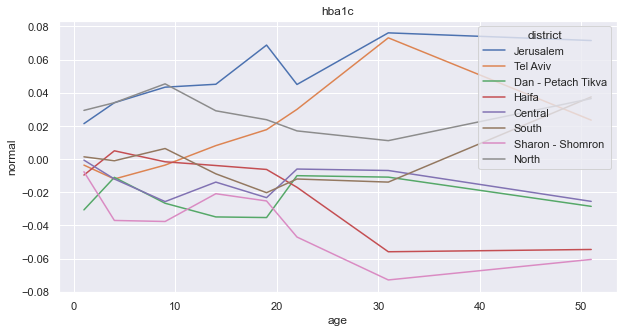

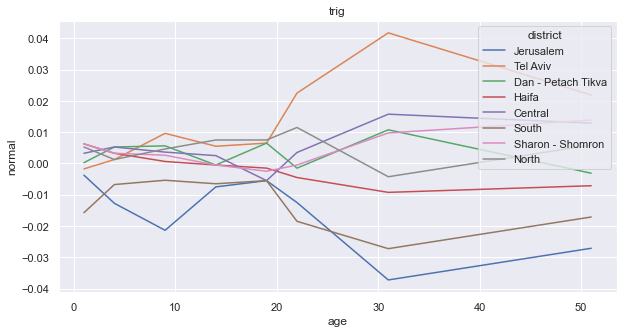

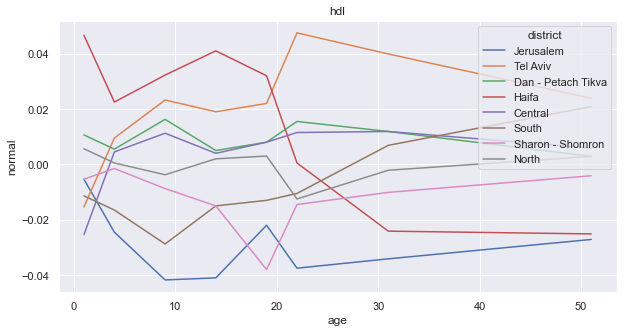

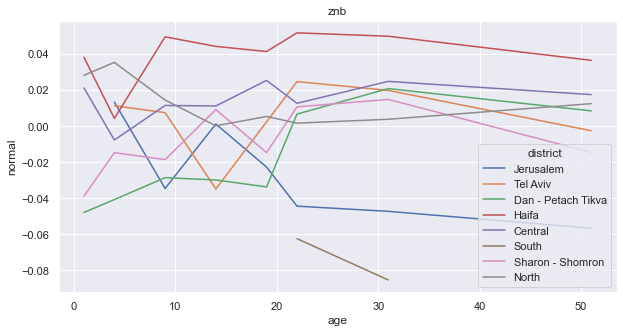

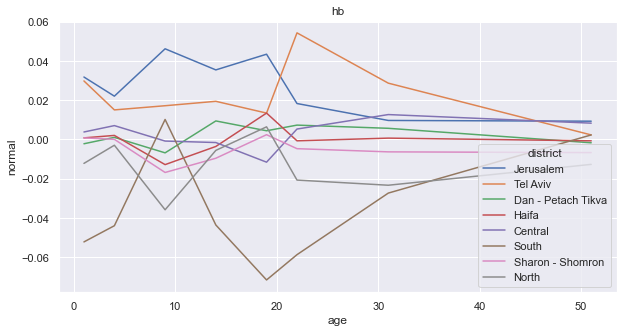

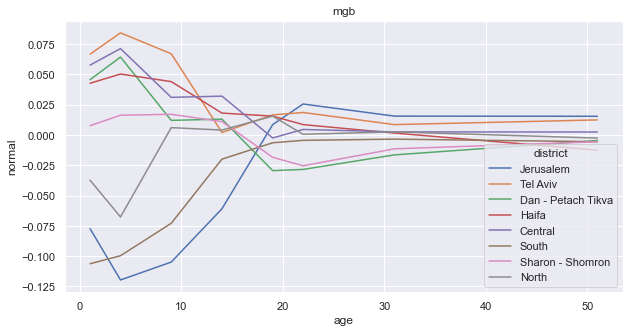

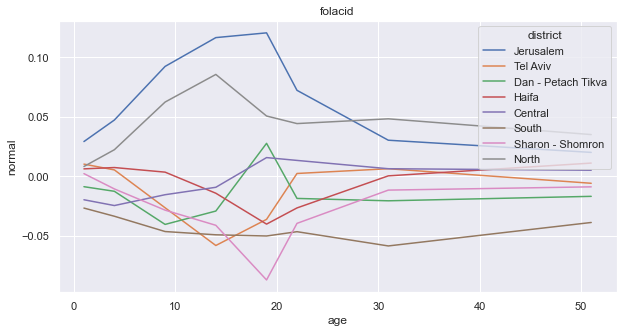

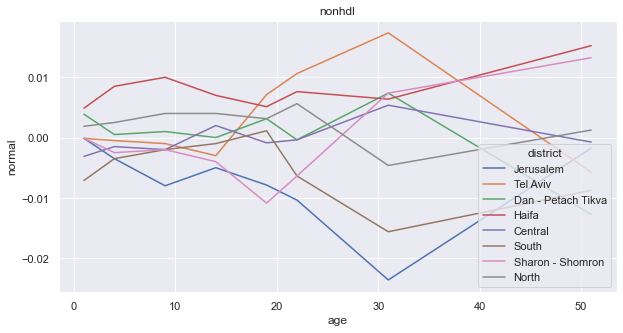

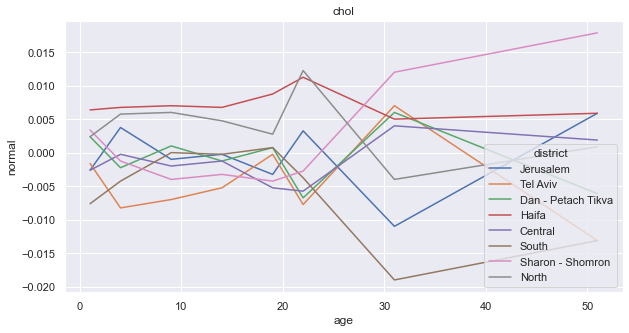

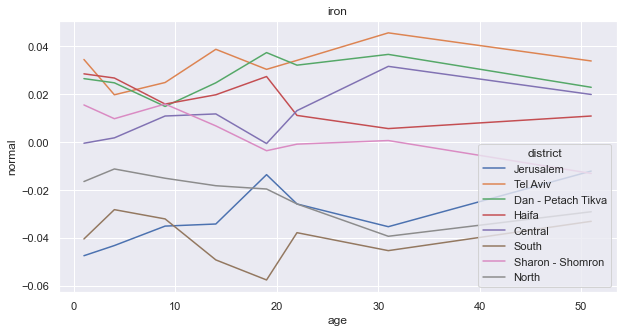

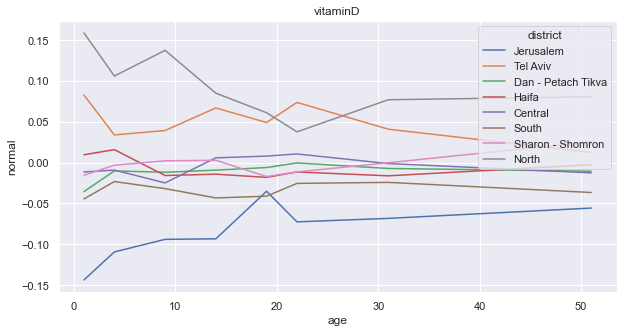

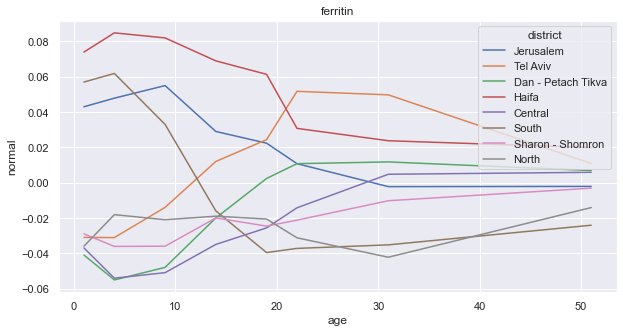

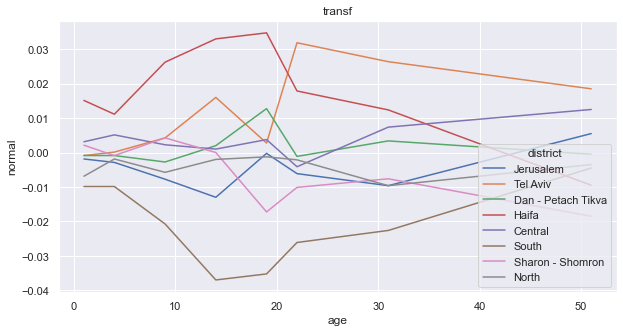

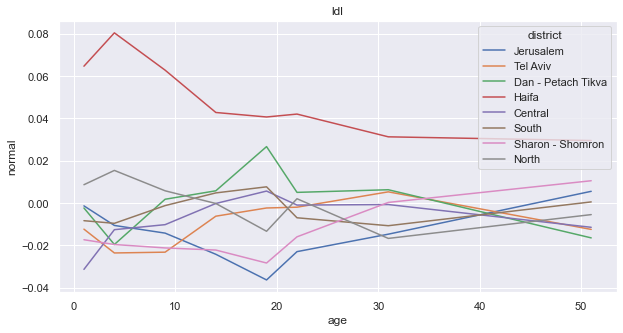

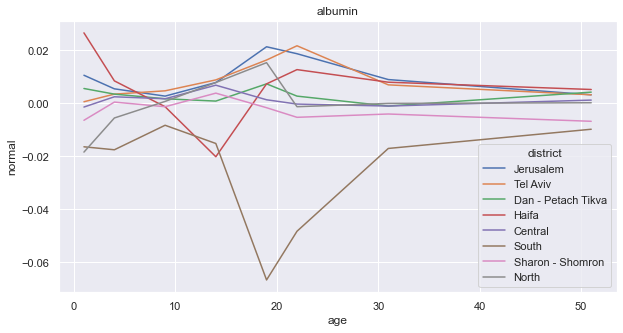

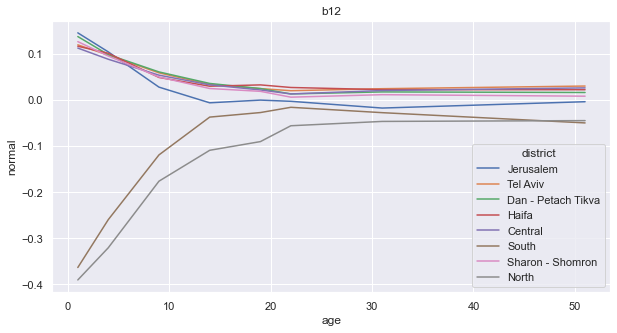

In [46]:
tmp = df[(df.first_split == 'district') & (df.second_split == 'age_group')& (df.third_split.isna())]
#tmp['district'] = tmp.second_split_val.apply(lambda x: districts[x])
tmp['district'] = tmp.first_split_val.apply(lambda x: districts[x])
tmp['age'] = tmp.second_split_val.apply(lambda x: int(x.split('-')[0].split('+')[0]))
tmp = tmp[tmp['age'] < 60]
tmp = tmp[tmp.district != 'Eilat']
means = tmp.groupby(['test_name', 'age']).mean()

tmp['normal'] = [x[3] - means.loc[(x[0], x[2])].normal_pct for x in tmp[['test_name', 'district', 'age', 'normal_pct']].values]

#tmp = tmp[tmp.sector != 'Arab']
order = list(districts.values())
order.pop(order.index('Eilat'))


for test in tmp.test_name.unique():
    plt.figure(figsize=(10,5))
    p = sns.lineplot(x="age", y="normal", markers=True, hue='district', hue_order = order, data=tmp[tmp.test_name == test])
    p.set_title(test)
#g = sns.FacetGrid(data=tmp, row='test_name', sharey='none', aspect=2, height=3, hue='district', hue_order = order)
#g.map(sns.lineplot, "age", "normal_pct", markers=True)
#g.add_legend()

        

C:\ProgramData\Anaconda2\envs\strauss\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\envs\strauss\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


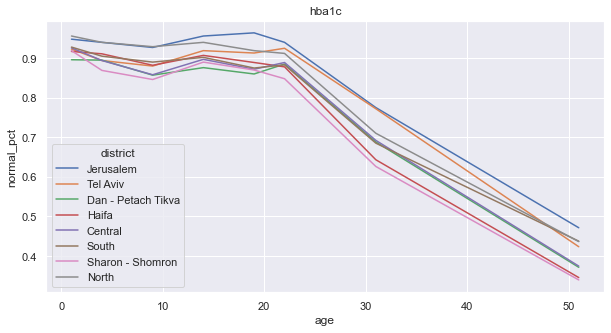

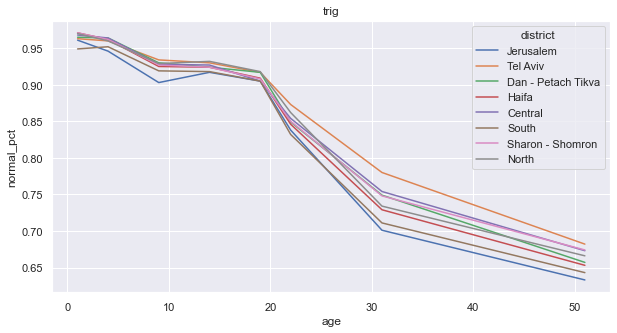

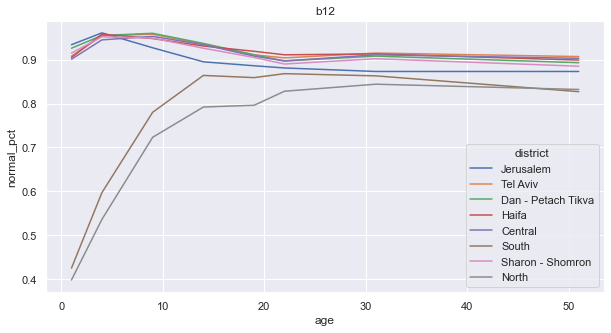

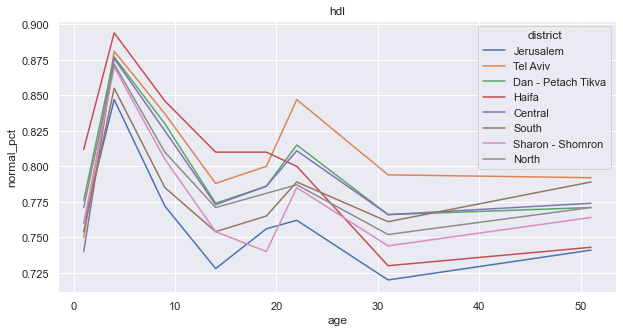

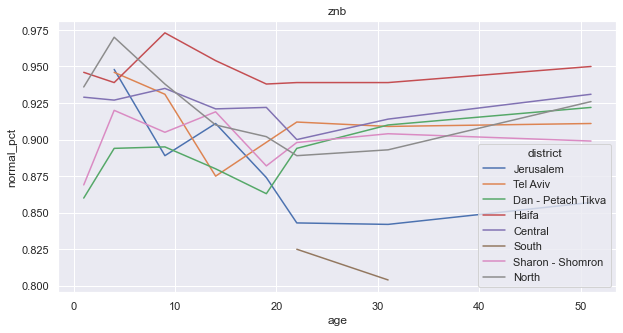

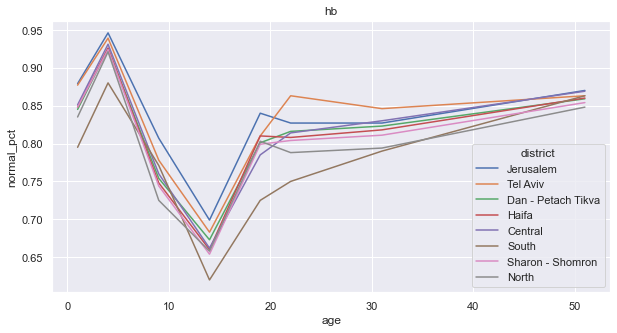

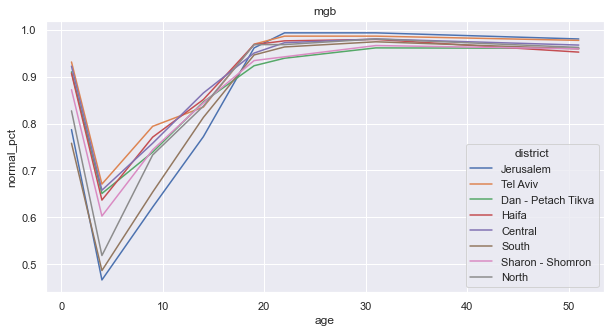

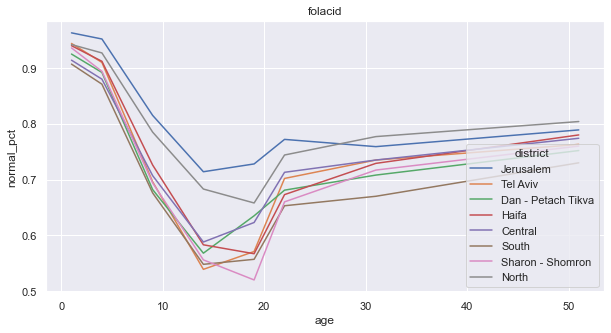

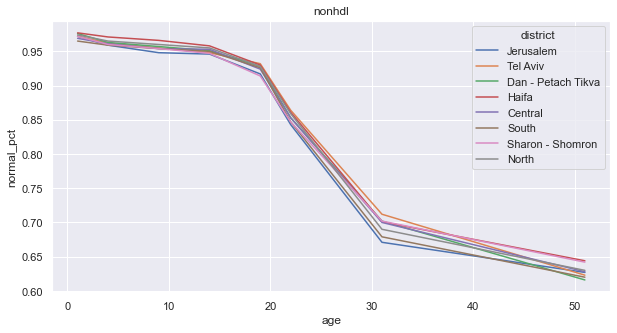

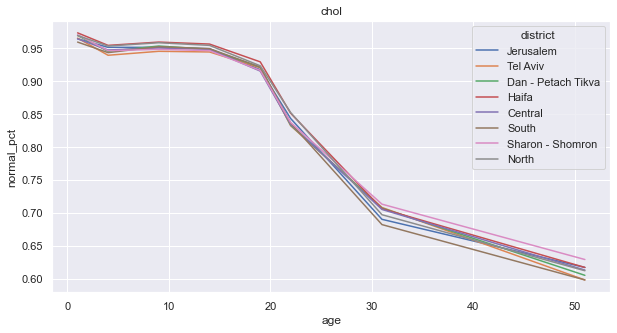

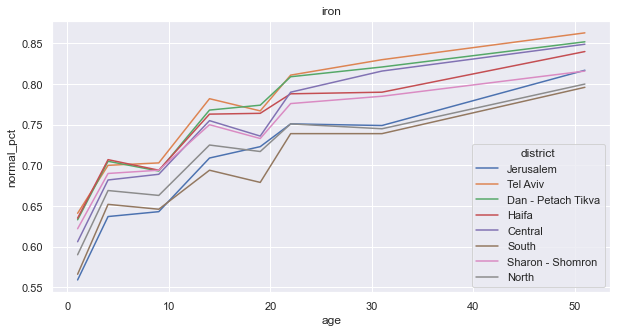

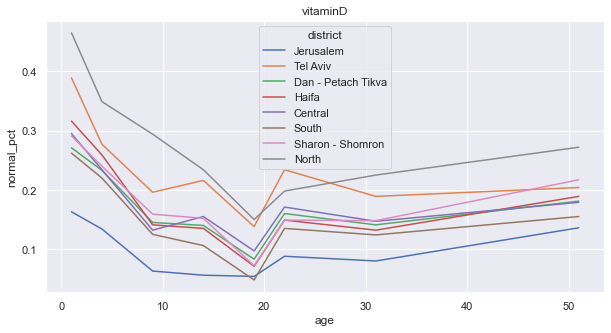

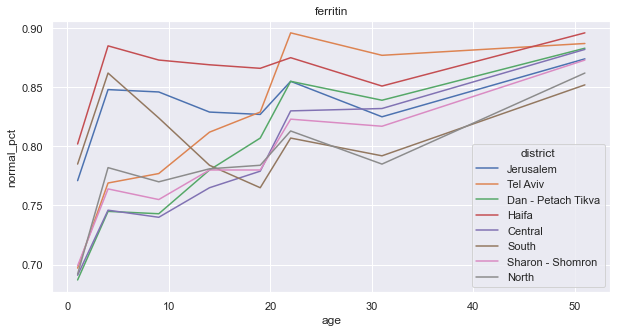

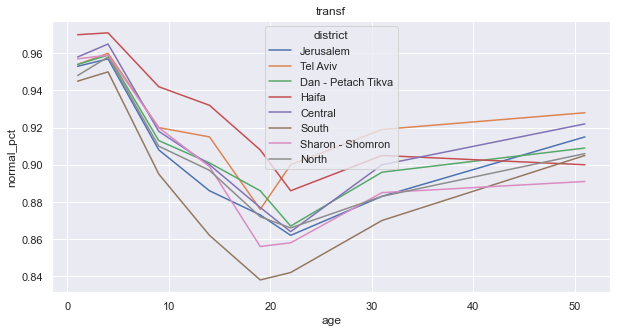

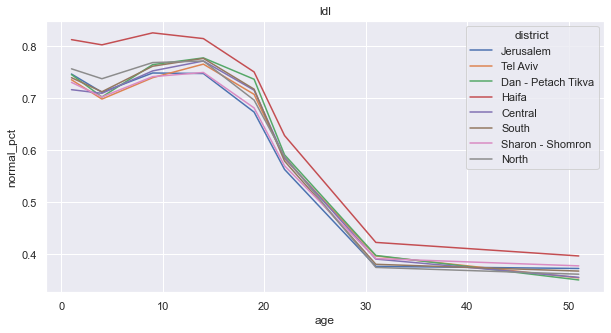

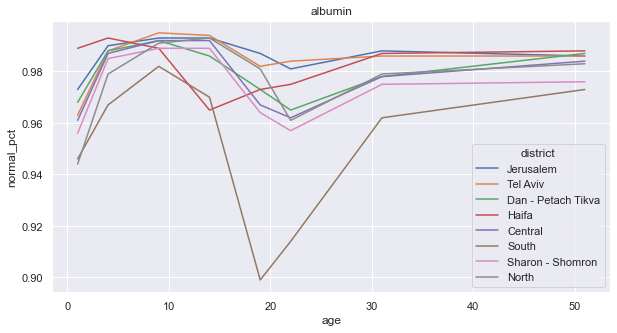

In [13]:
tmp = df[(df.first_split == 'district') & (df.second_split == 'age_group')& (df.third_split.isna())]
#tmp['district'] = tmp.second_split_val.apply(lambda x: districts[x])
tmp['district'] = tmp.first_split_val.apply(lambda x: districts[x])
tmp['age'] = tmp.second_split_val.apply(lambda x: int(x.split('-')[0].split('+')[0]))
tmp = tmp[tmp['age'] < 60]
#tmp = tmp[tmp.sector != 'Arab']
order = list(districts.values())
order.pop(order.index('Eilat'))
for test in tmp.test_name.unique():
    plt.figure(figsize=(10,5))
    p = sns.lineplot(x="age", y="normal_pct", markers=True, hue='district', hue_order = order, data=tmp[tmp.test_name == test])
    p.set_title(test)
#g = sns.FacetGrid(data=tmp, row='test_name', sharey='none', aspect=2, height=3, hue='district', hue_order = order)
#g.map(sns.lineplot, "age", "normal_pct", markers=True)
#g.add_legend()



C:\ProgramData\Anaconda2\envs\strauss\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda2\envs\strauss\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\envs\strauss\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

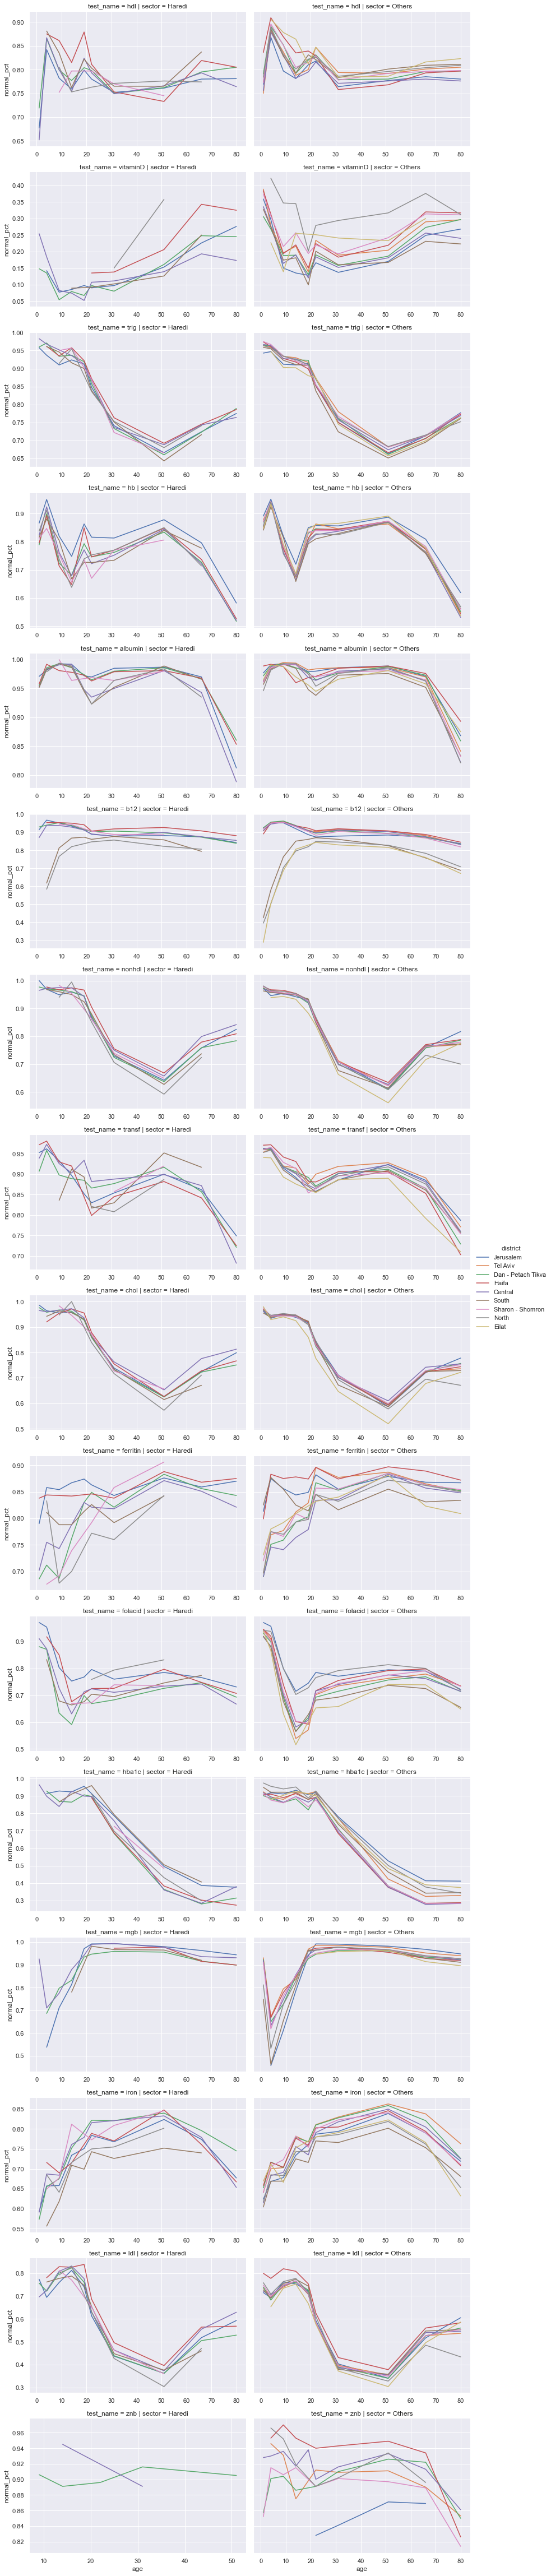

In [14]:
tmp = df[(df.first_split == 'sector') & (df.second_split == 'district')& (df.third_split == 'age_group')& (df.fourth_split.isna())]
tmp['district'] = tmp.second_split_val.apply(lambda x: districts[x])
tmp['sector'] = tmp.first_split_val.apply(lambda x: {'1': 'Arab', '2': "Haredi", '9': 'Others'}[x])
tmp['age'] = tmp.third_split_val.apply(lambda x: int(x.split('-')[0].split('+')[0]))
tmp = tmp[tmp.sector != 'Arab']
g = sns.FacetGrid(data=tmp, row='test_name', col='sector', sharex='none',sharey='row', aspect=1.5, height=4, hue='district', hue_order = list(districts.values()))
g.map(sns.lineplot, "age", "normal_pct", markers=True)
g.add_legend()

In [20]:
tmp = df[(df.first_split == 'sector') & (df.second_split == 'age_group')& (df.third_split.isna())]
#tmp['district'] = tmp.second_split_val.apply(lambda x: districts[x])
tmp['sector'] = tmp.first_split_val.apply(lambda x: {'1': 'Arab', '2': "Haredi", '9': 'Others'}[x])
tmp['age'] = tmp.second_split_val.apply(lambda x: int(x.split('-')[0].split('+')[0]))
tmp = tmp[tmp.sector != 'Arab']
tmp.head()

<ipython-input-20-64ff7a1fa114>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['sector'] = tmp.first_split_val.apply(lambda x: {'1': 'Arab', '2': "Haredi", '9': 'Others'}[x])
<ipython-input-20-64ff7a1fa114>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['age'] = tmp.second_split_val.apply(lambda x: int(x.split('-')[0].split('+')[0]))


,Unnamed: 0,pop_name,condition,test_name,first_split,first_split_val,second_split,second_split_val,third_split,third_split_val,fourth_split,fourth_split_val,low_val_pct,normal_pct,high_val_pct,sector,age
34380,34381,overall,active_malignancy=0 and ibd=0 and rhemartoid_a...,iron,sector,9,age_group,01-3,NaN,NaN,NaN,NaN,0.301,0.633,0.067,Others,1
34381,34382,overall,active_malignancy=0 and ibd=0 and rhemartoid_a...,albumin,sector,9,age_group,19-21,NaN,NaN,NaN,NaN,0.022,0.971,0.007,Others,19
34382,34383,overall,active_malignancy=0 and ibd=0 and rhemartoid_a...,b12,sector,2,age_group,14-18,NaN,NaN,NaN,NaN,0.046,0.929,0.025,Haredi,14
34384,34385,overall,active_malignancy=0 and ibd=0 and rhemartoid_a...,ferritin,sector,2,age_group,80+,NaN,NaN,NaN,NaN,0.051,0.857,0.092,Haredi,80
34386,34387,overall,active_malignancy=0 and ibd=0 and rhemartoid_a...,mgb,sector,9,age_group,04-8,NaN,NaN,NaN,NaN,0.005,0.585,0.410,Others,4


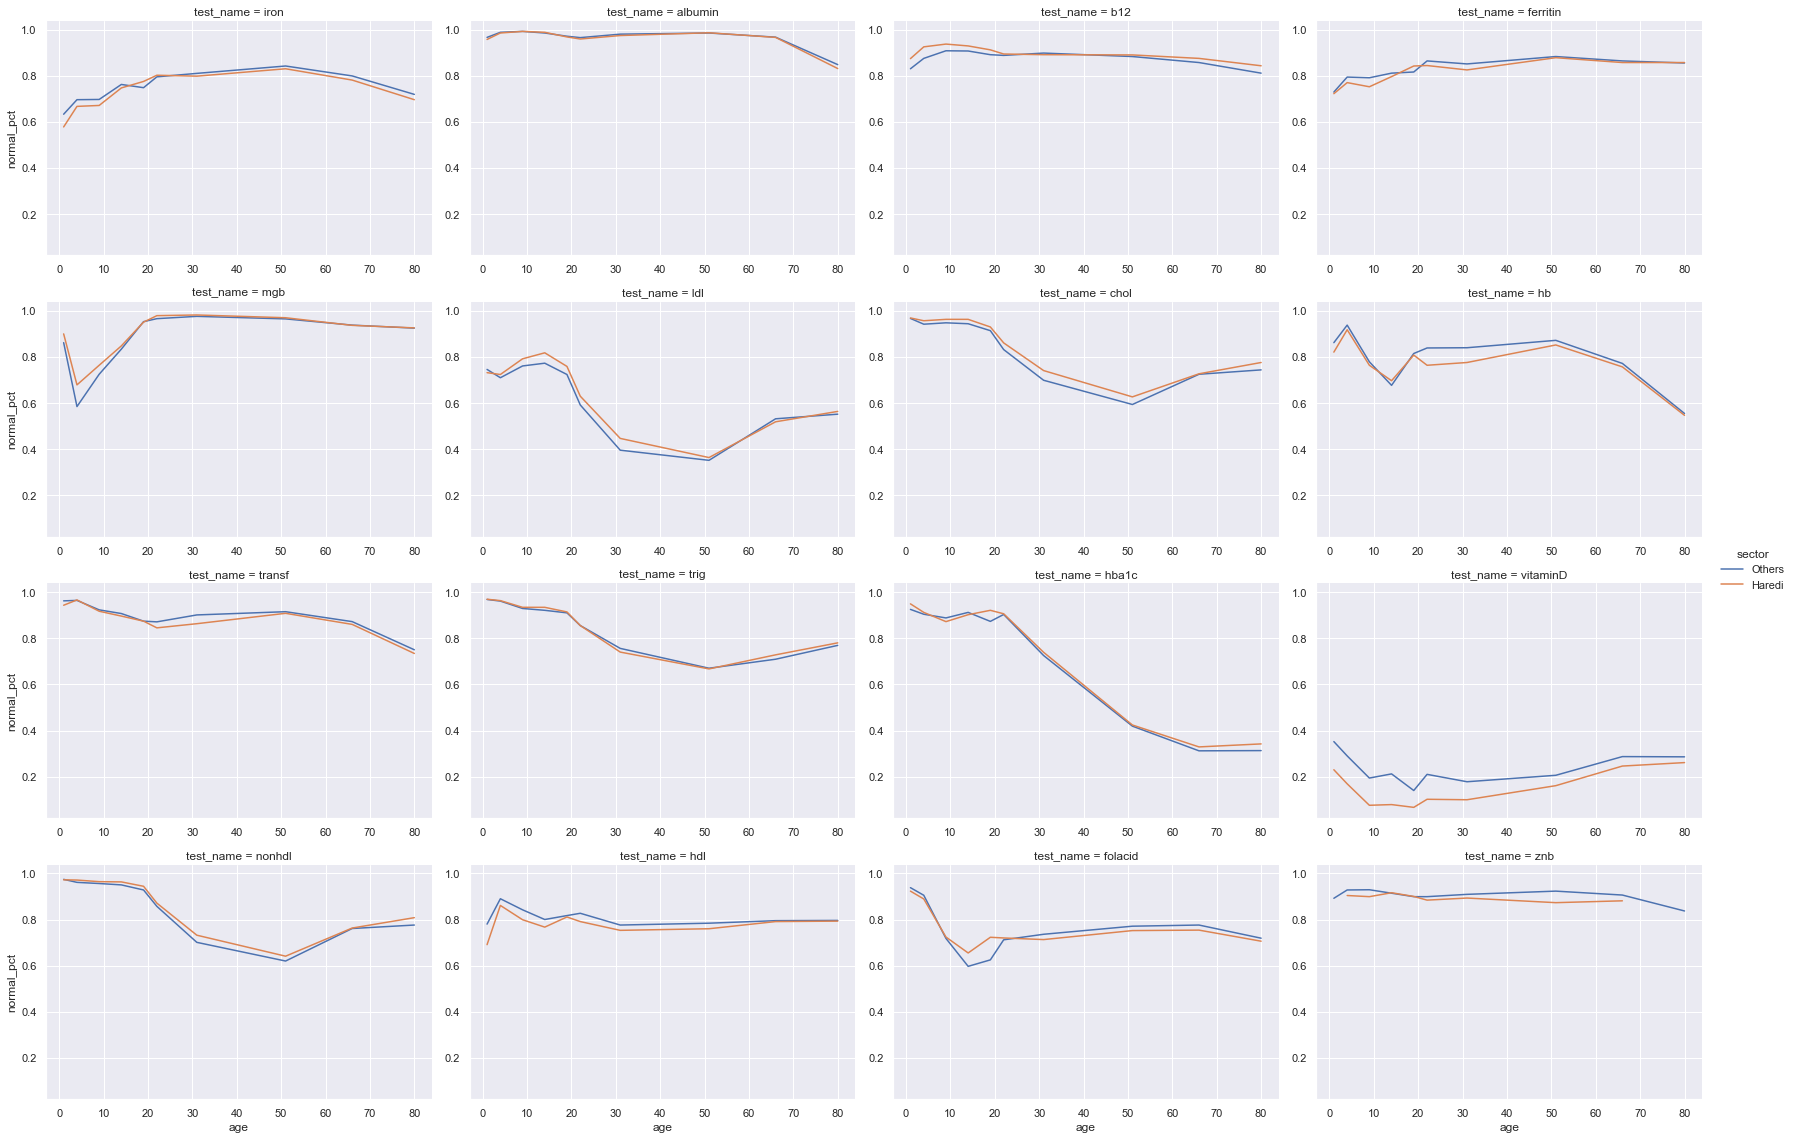